# Initialization

## Initilization of libraries

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

## Initialization of cards database

In [2]:
cards_database = {
    "Abrade": {"type": "removal", "subtype": "removal_artifact"},
    "Ancient Tomb": {"type": "land", "subtype": "sol_land"},
    "Arcane Artisan": {"type": "a", "subtype": "arcane_artisan"},
    "Archon of Cruelty": {"type": "b", "subtype": "creature"},
    "Arid Mesa": {"type": "land", "subtype": "fetchland"},
    "Atraxa, Grand Unifier": {"type": "b", "subtype": "creature"},
    "Blood Moon": {"type": "hate", "subtype": "hate_lands"},
    "Bloodbraid Marauder": {"type": "creature", "subtype": "creature_t2"},
    "Bloodstained Mire": {"type": "land", "subtype": "fetchland"},
    "Blue Elemental Blast": {"type": "blue_blast", "subtype": "blue_blast_t2"},
    "Bonecrusher Giant": {"type": "removal", "subtype": "removal_t2"},
    "Boseiju, Who Shelters All": {"type": "anti_counter", "subtype": "anti_counter_land"},
    "Brainstorm": {"type": "cantrip", "subtype": "cantrip_t1"},
    "Brazen Borrower": {"type": "creature", "subtype": "creature_t1"},
    "Brotherhood's End": {"type": "removal", "subtype": "removal_massive"},
    "Chain Lightning": {"type": "removal", "subtype": "removal_t1"},
    "Chart a Course": {"type": "cantrip", "subtype": "cantrip_t2"},
    "City of Traitors": {"type": "land", "subtype": "sol_land"},
    "Counterbalance": {"type": "counter", "subtype": "counter_t2"},
    "Counterspell": {"type": "counter", "subtype": "counter_t2"},
    "Crystal Vein": {"type": "land", "subtype": "sol_land"},
    "Cunning Wish": {"type": "b", "subtype": "cunning"},
    "Daze": {"type": "counter", "subtype": "counter_t1"},
    "Defense Grid": {"type": "anti_counter", "subtype": "anti_counter_artifact"},
    "Delver of Secrets": {"type": "creature", "subtype": "creature_t1"},
    "Dismember": {"type": "removal", "subtype": "removal_t2"},
    "Dragon's Rage Channeler": {"type": "creature", "subtype": "creature_t1"},
    "Echoing Truth": {"type": "removal", "subtype": "removal_bouncer"},
    "Electrostatic Infantry": {"type": "creature", "subtype": "creature_t2"},
    "Emrakul, the Aeons Torn": {"type": "b", "subtype": "creature"},
    "End the Festivities": {"type": "removal", "subtype": "removal_massive"},
    "Etali, Primal Conqueror": {"type": "b", "subtype": "creature"},
    "Ethereal Forager": {"type": "creature", "subtype": "creature_t2"},
    "Fable of the Mirror-Breaker": {"type": "other", "subtype": "other_t1"},
    "Faerie Macabre": {"type": "hate", "subtype": "hate_graveyard"},
    "Faerie Mastermind": {"type": "creature", "subtype": "creature_t2"},
    "Fire/Ice": {"type": "removal", "subtype": "removal_t2"},
    "Flooded Strand": {"type": "land", "subtype": "fetchland"},
    "Flusterstorm": {"type": "counter", "subtype": "counter_t2"},
    "Force of Negation": {"type": "counter", "subtype": "counter_t2"},
    "Force of Will": {"type": "counter", "subtype": "counter_t1"},
    "Forked Bolt": {"type": "removal", "subtype": "removal_t2"},
    "Fury": {"type": "removal", "subtype": "removal_t2"},
    "Grafdigger's Cage": {"type": "hate", "subtype": "hate_graveyard"},
    "Grim Lavamancer": {"type": "creature", "subtype": "creature_t2"},
    "Griselbrand": {"type": "b", "subtype": "creature"},
    "Hullbreacher": {"type": "other", "subtype": "other_t2"},
    "Hydroblast": {"type": "blue_blast", "subtype": "blue_blast_t1"},
    "Impulse": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Intuition": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Invasion of Tarkir": {"type": "other", "subtype": "other_t2"},
    "Island": {"type": "land", "subtype": "island"},
    "Kozilek's Return": {"type": "removal", "subtype": "removal_massive"},
    "Leyline of the Void": {"type": "hate", "subtype": "hate_graveyard"},
    "Lightning Bolt": {"type": "removal", "subtype": "removal_t1"},
    "Lotus Petal": {"type": "accelerator", "subtype": "accelerator_t1"},
    "Maddening Hex": {"type": "other", "subtype": "other_t1"},
    "Magus of the Moon": {"type": "hate", "subtype": "hate_lands"},
    "Malevolent Hermit": {"type": "anti_counter", "subtype": "anti_counter_creature"},
    "Meltdown": {"type": "hate", "subtype": "hate_artifacts"},
    "Mercurial Spelldancer": {"type": "creature", "subtype": "creature_t2"},
    "Minor Misstep": {"type": "counter", "subtype": "counter_t2"},
    "Misdirection": {"type": "counter", "subtype": "counter_t2"},
    "Mishra's Bauble": {"type": "bauble", "subtype": "bauble_t1"},
    "Misty Rainforest": {"type": "land", "subtype": "fetchland"},
    "Mountain": {"type": "land", "subtype": "mountain"},
    "Murktide Regent": {"type": "creature", "subtype": "creature_t1"},
    "Mystic Sanctuary": {"type": "land", "subtype": "mystic_sanctuary"},
    "Null Rod": {"type": "hate", "subtype": "hate_artifact"},
    "Omniscience": {"type": "b", "subtype": "omniscience"},
    "One with the Multiverse": {"type": "b", "subtype": "omniscience"},
    "Orcish Bowmasters": {"type": "creature", "subtype": "creature_t1"},
    "Otawara, Soaring City": {"type": "land", "subtype": "other_land"},
    "Peek": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Polluted Delta": {"type": "land", "subtype": "fetchland"},
    "Ponder": {"type": "cantrip", "subtype": "cantrip_t1"},
    "Predict": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Preordain": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Pyroblast": {"type": "red_blast", "subtype": "red_blast_t1"},
    "Reckless Impulse": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Red Elemental Blast": {"type": "red_blast", "subtype": "red_blast_t2"},
    "Rushing River": {"type": "removal", "subtype": "removal_bouncer"},
    "Sauron's Ransom": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Scalding Tarn": {"type": "land", "subtype": "fetchland"},
    "Show and Tell": {"type": "a", "subtype": "show_and_tell"},
    "Simian Spirit Guide": {"type": "accelerator", "subtype": "accelerator_t2"},
    "Sneak Attack": {"type": "a", "subtype": "sneak_attack"},
    "Snow-Covered Island": {"type": "land", "subtype": "island"},
    "Snuff Out": {"type": "removal", "subtype": "removal_t2"},
    "Soul-Guide Lantern": {"type": "hate", "subtype": "hate_graveyard"},
    "Spell Pierce": {"type": "counter", "subtype": "counter_t2"},
    "Sprite Dragon": {"type": "creature", "subtype": "creature_t2"},
    "Steam Vents": {"type": "land", "subtype": "shockland"},
    "Stifle": {"type": "counter", "subtype": "counter_t2"},
    "Surgical Extraction": {"type": "hate", "subtype": "hate_graveyard"},
    "Third Path Iconoclast": {"type": "creature", "subtype": "creature_t2"},
    "Thought Scour": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Tropical Island": {"type": "land", "subtype": "dual"},
    "True-Name Nemesis": {"type": "creature", "subtype": "creature_t2"},
    "Underground Sea": {"type": "land", "subtype": "dual"},
    "Unholy Heat": {"type": "removal", "subtype": "removal_t1"},
    "Vesuvan Drifter": {"type": "a", "subtype": "vesuvan_drifter"},
    "Volcanic Island": {"type": "land", "subtype": "dual"},
    "Wasteland": {"type": "land", "subtype": "wasteland"},
    "Wrenns Resolve": {"type": "cantrip", "subtype": "cantrip_t2"},
    "Young Pyromancer": {"type": "creature", "subtype": "creature_t2"},
    "Wipe Away": {"type": "removal", "subtype": "removal_bouncer"},
}

# Reading of files and df creation

## Txt files reading

In [3]:
path = "./Decklists"
df = pd.DataFrame()
for i, file in enumerate(os.listdir(path)):
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = path + "/" + file
        df = pd.concat([df, pd.read_csv(file_path, header=None, skip_blank_lines=False, sep="*")], axis=1)
df.columns = list(range(len(df.columns)))

# Change df to extended form and creation of new columns

## Melting of df, and creation of "sb", "quantity" and "name" columns

In [4]:
df = pd.melt(df, var_name= "#dl", value_name="cards")
df["sb"] = 0
df[["qty", "name"]] = df["cards"].str.split(" ", n=1, expand=True)
df = df.drop("cards", axis=1)
df

,#dl,sb,qty,name
0,0,0,4,Brainstorm
1,0,0,4,Daze
2,0,0,2,Delver of Secrets
3,0,0,4,Dragon's Rage Channeler
4,0,0,2,Flooded Strand
...,...,...,...,...
1745,49,0,1,Plague Engineer
1746,49,0,3,Pyroblast
1747,49,0,1,Surgical Extraction
1748,49,0,NaN,NaN


## Separation of main ("sb"=0) and sb ("sb"=1) using NaNs

In [5]:
for decklist_no in df["#dl"].unique():
    index_start = df.loc[df["#dl"]==decklist_no].iloc[0].name
    index_sb = df.loc[(df["#dl"]==decklist_no) & (df["qty"].isna()), "name"].index[0]
    index_end = index_start + df.loc[df["#dl"]==decklist_no].shape[0]
    df.iloc[index_sb:index_end, 1] = 1

## Dropa NaNs after separation of main and sb

In [6]:
df = df.dropna(ignore_index=True)

## Change "qty" to int after dropping nans

In [7]:
df["qty"] = df["qty"].astype(int)

C:\Users\lopez\AppData\Local\Temp\ipykernel_18504\3847684083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qty"] = df["qty"].astype(int)


## Creating columns "type" and "subtype" mapping database dictionary

In [8]:
df["type"] = df["name"].map(cards_database).str["type"]
df["subtype"] = df["name"].map(cards_database).str["subtype"]

C:\Users\lopez\AppData\Local\Temp\ipykernel_18504\24203143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type"] = df["name"].map(cards_database).str["type"]
C:\Users\lopez\AppData\Local\Temp\ipykernel_18504\24203143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["subtype"] = df["name"].map(cards_database).str["subtype"]


## Creation of "type" and "subtype" categorical Dtype so df can be ordered by this columns

In [9]:
type_category = CategoricalDtype(
    ordered=True,
    categories=[
        "creature",
        "counter",
        "red_blast",
#        "blue_blast",
        "removal",
        "cantrip",
        "bauble",
        "other",
        "land",
    ]
)

In [10]:
subtype_category = CategoricalDtype(
    ordered=True,
    categories=[
        "creature_t1", "creature_t2",
        "counter_t1", "counter_t2",
#        "red_blast_t1", "red_blast_t2",
#        "blue_blast_t1", "blue_blast_t2",
        "removal_t1", "removal_t2",
        "cantrip_t1","cantrip_t2",
        "bauble_t1", "bauble_t2",
        "other_t1", "other_t2",
        "dual", "shockland", "island", "mountain", "mystic_sanctuary", "fetchland", "wasteland", "other_land"
    ]
)

In [11]:
# type_category = CategoricalDtype(
#     ordered=True,
#     categories=[
#         "a",
#         "b",
#         "counter",
#         "anti_counter",
#         "cantrip",
#         "removal",
#         "hate",
#         "other",
#         "accelerator",
#         "land",
#         "red_blast",
#         "blue_blast",
#     ]
# )

In [12]:
# subtype_category = CategoricalDtype(
#     ordered=True,
#     categories=[
#         "show_and_tell", "sneak_attack", "vesuvan_drifter", "arcane_artisan",
#         "creature", "omniscience", "cunning",
#         "counter_t1", "counter_t2",
#         "anti_counter_artifact", "anti_counter_land", "anti_counter_creature",
#         "cantrip_t1","cantrip_t2",
#         "removal_t1", "removal_t2", "removal_artifact", "removal_bouncer", "removal_massive",
#         "hate_graveyard", "hate_artifacts", "hate_lands",
#         "other_t1", "other_t2",
#         "accelerator_t1", "accelerator_t2",
#         "dual", "shockland", "island", "mountain", "fetchland", "sol_land", "other_land",
#         "red_blast_t1", "red_blast_t2",
#         "blue_blast_t1", "blue_blast_t2",
#     ]
# )

In [13]:
df["type"] = df["type"].astype(type_category)
df["subtype"] = df["subtype"].astype(subtype_category)

C:\Users\lopez\AppData\Local\Temp\ipykernel_18504\4041214861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["type"] = df["type"].astype(type_category)
C:\Users\lopez\AppData\Local\Temp\ipykernel_18504\4041214861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["subtype"] = df["subtype"].astype(subtype_category)


In [14]:
df

,#dl,sb,qty,name,type,subtype
0,0,0,4,Brainstorm,cantrip,cantrip_t1
1,0,0,4,Daze,counter,counter_t1
2,0,0,2,Delver of Secrets,creature,creature_t1
3,0,0,4,Dragon's Rage Channeler,creature,creature_t1
4,0,0,2,Flooded Strand,land,fetchland
...,...,...,...,...,...,...
1486,49,1,2,Meltdown,NaN,NaN
1487,49,1,2,Nihil Spellbomb,NaN,NaN
1488,49,1,1,Plague Engineer,NaN,NaN
1489,49,1,3,Pyroblast,red_blast,NaN


# Decklists by card type

## Distribution by card type

### Fine tuner function to adjust the difference between the mean of each group and the target

In [15]:
def fine_tuner_types(df, target, col_to_be_tuned, col_diff):
    df["final_qty"] = df[col_to_be_tuned]
    while df["final_qty"].sum() != target:
        if df["final_qty"].sum() < target:
            index = df[col_diff].idxmax()
            df.loc[index, "final_qty"] += 1
            df.loc[index, "diff"] -= 1
        else:
            index = df[col_diff].idxmin()
            df.loc[index, "final_qty"] -= 1
            df.loc[index, "diff"] += 1
    return df

### Creation of df "cardtypes" with means per groups and plotting of distributions

75.0


,mean,sb,mean_rounded,diff,final_qty
creature,14.32,0,14.0,-0.68,15.0
counter,8.86,0,9.0,-0.14,9.0
removal,4.90,0,5.0,-0.10,5.0
cantrip,8.88,0,9.0,-0.12,9.0
bauble,2.92,0,3.0,-0.08,3.0
land,18.44,0,18.0,-0.56,19.0
creature,0.46,1,0.0,-1.54,2.0
counter,2.76,1,3.0,-1.24,4.0
red_blast,3.20,1,3.0,-0.80,4.0
removal,0.16,1,0.0,-0.84,1.0


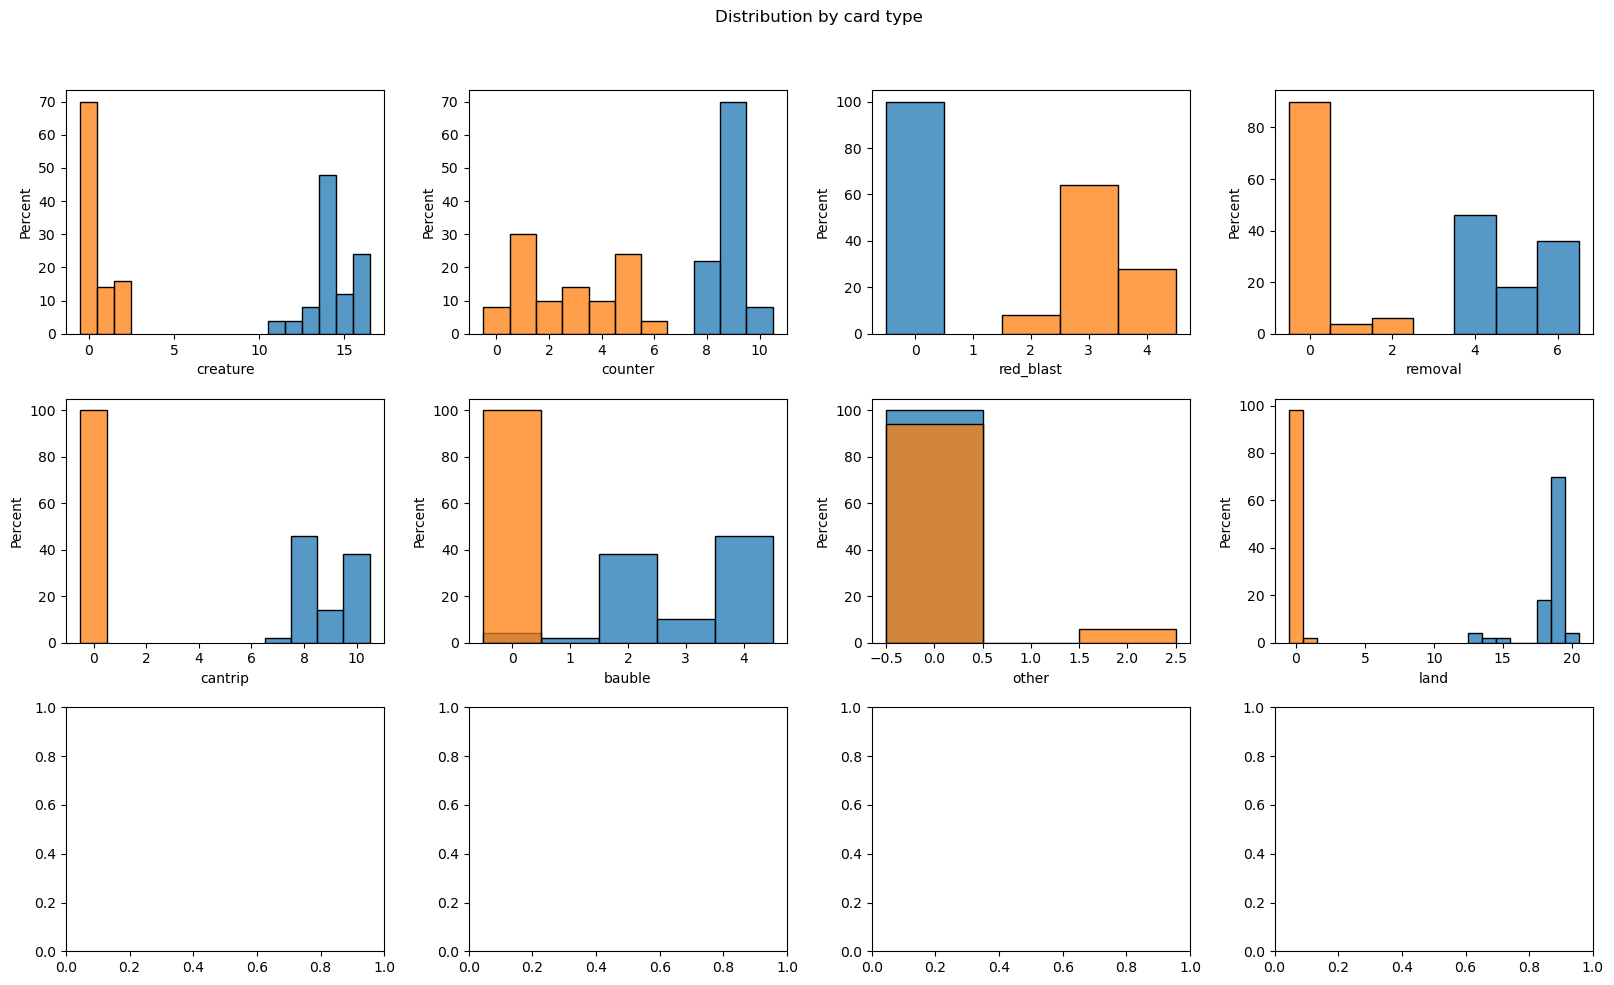

In [16]:
# Creation of fig and subplots
fig, axs = plt.subplots(3, 4, figsize=(16,10))

# Defines a tight layout for subplots, and a height and weight padding of 3, 3 respectively.
fig.tight_layout(h_pad=3, w_pad=3)

# Creates and overall title
fig.suptitle('Distribution by card type')

# This defines the height of the top edge of the subplots, relative to the total figure height.
# E.g.: top=0.9 means that top edge of subplots will be at 90% of the total height of the figure. Therefore,
# the 10% left is where suptitle will be placed
plt.subplots_adjust(top=0.9)

main_and_sb_types = []
for sb in range(2):
    mean_ = []
    indices = []
    for i, category in enumerate(type_category.categories):
        group = df.groupby(by=["#dl", "type", "sb"])[["qty", "name"]].sum().reset_index()
        group = group.loc[(group["type"]==category) & (group["sb"]==sb)]
        mean_.append(group["qty"].mean())
        indices.append(category)
        ax_x = i // 4
        ax_y = i % 4
        sns.histplot(data=group, x="qty", ax=axs[ax_x,ax_y], stat="percent", discrete=True)
        axs[ax_x,ax_y].set_xlabel(category)
    temp_df = pd.DataFrame({"mean": mean_, "sb": sb}, index=indices)
    temp_df["mean_rounded"] = temp_df["mean"].round(0)
    temp_df["diff"] = temp_df["mean"] - temp_df["mean_rounded"]
    target = 60 if sb==0 else 15
    temp_df = fine_tuner_types(temp_df, target, "mean_rounded", "diff")
    main_and_sb_types.append(temp_df)
final_list_types = pd.concat(main_and_sb_types, axis=0)
print(final_list_types["final_qty"].sum())
final_list_types.loc[final_list_types["final_qty"]>0]

# Selection of cards inside each type category

## Cards analysis without card types

In [17]:
def fine_tuner_cards_no_type(df, target, col_to_be_tuned, col_diff):
    df["final_qty"] = df[col_to_be_tuned]
    while df["final_qty"].sum() != target:
        if df["final_qty"].sum() < target:
            index = df[col_diff].idxmax()
            df.loc[index, "final_qty"] += 1
            df.loc[index, "diff"] -= 1
            if df.loc[index, "final_qty"] > 4:
                target +=1
        else:
            index = df[col_diff].idxmin()
            df.loc[index, "final_qty"] -= 1
            df.loc[index, "diff"] += 1
            if df.loc[index, "final_qty"] < 0:
                target -=1
    df.loc[df["final_qty"]>4, "final_qty"] = 4
    df.loc[df["final_qty"]<0, "final_qty"] = 0
    return df

In [18]:
decklists_no = df.iloc[-1, 0] + 1
main_and_sb_no_types = []
for sb in range(2):
    group = df.loc[df["sb"]==sb].groupby(by=["name"])["qty"].sum()
    temp_df = pd.DataFrame(group)
    temp_df["sb"] = sb
    
    temp_df["type"] = temp_df.index.map(cards_database).str["type"].astype(type_category)
    temp_df["subtype"] = temp_df.index.map(cards_database).str["subtype"].astype(subtype_category)
#     df["type"] = df["type"].astype(type_category)
#     df["subtype"] = df["subtype"].astype(subtype_category)

    temp_df["mean"] = temp_df["qty"] / decklists_no
    temp_df["mean_rounded"] = temp_df["mean"].round(0)
    temp_df["diff"] = temp_df["mean"] - temp_df["mean_rounded"]
    temp_df = temp_df.sort_values(by=["type", "subtype"])
    target = 60 if sb==0 else 15
    temp_df = fine_tuner_cards_no_type(temp_df, target=target, col_to_be_tuned="mean_rounded", col_diff="diff")
    temp_df = temp_df.loc[temp_df["final_qty"]>0]
    main_and_sb_no_types.append(temp_df)
final_list_no_types = pd.concat(main_and_sb_no_types, axis=0, )
print(final_list_no_types["final_qty"].sum())
final_list_no_types

75.0


,qty,sb,type,subtype,mean,mean_rounded,diff,final_qty
name,,,,,,,,
Brazen Borrower,33,0,creature,creature_t1,0.66,1.0,-0.34,1.0
Delver of Secrets,127,0,creature,creature_t1,2.54,3.0,-0.46,3.0
Dragon's Rage Channeler,200,0,creature,creature_t1,4.00,4.0,0.00,4.0
Murktide Regent,168,0,creature,creature_t1,3.36,3.0,0.36,3.0
Orcish Bowmasters,187,0,creature,creature_t1,3.74,4.0,-0.26,4.0
Daze,199,0,counter,counter_t1,3.98,4.0,-0.02,4.0
Force of Will,200,0,counter,counter_t1,4.00,4.0,0.00,4.0
Spell Pierce,24,0,counter,counter_t2,0.48,0.0,-0.52,1.0
Lightning Bolt,195,0,removal,removal_t1,3.90,4.0,-0.10,4.0


## Fine tuner function to adjust the difference between the mean of each group and the target

In [19]:
def fine_tuner_cards_types(df, types, targets, col_to_be_tuned, col_diff):
    df["final_qty"] = df[col_to_be_tuned]
    for type, target in zip(types, targets):
        subset = df.loc[df["type"]==type]
        while subset["final_qty"].sum() != target:
            if subset["final_qty"].sum() < target:
                index = subset[col_diff].idxmax()
                df.loc[index, "final_qty"] += 1
                df.loc[index, "diff"] -= 1
                if df.loc[index, "final_qty"] > 4:
                    target +=1
            else:
                index = subset[col_diff].idxmin()
                df.loc[index, "final_qty"] -= 1
                df.loc[index, "diff"] += 1
                if df.loc[index, "final_qty"] < 0:
                    target -=1
            subset = df.loc[df["type"]==type]
        df.loc[df["final_qty"]>4, "final_qty"] = 4
        df.loc[df["final_qty"]<0, "final_qty"] = 0
    return df

## Creation of df "cards" with means per card and plotting of distributions

In [20]:
fig.tight_layout(h_pad=3, w_pad=3)
plt.subplots_adjust(top=0.9)

main_and_sb_types_cards = []
card_types = type_category.categories
for sb in range(2):
    mean_ = []
    indices = []
    types = []
    for category in type_category.categories:
        cardnames = df.loc[(df["sb"]==sb) & (df["type"]==category), "name"].unique()
#         cols = 4
#         rows = math.ceil(len(cardnames) / cols)
#         rows = rows if rows>1 else 2
#         fig, axs = plt.subplots(rows, cols, figsize=(16,4*rows))
#         fig.suptitle('Distribution by card type: {}'.format(category))
        for i, cardname in enumerate(cardnames):
            group = df.groupby(by=["#dl", "type", "sb", "name"])["qty"].sum().reset_index()
            group = group.loc[(group["type"]==category) & (group["name"]==cardname) & (group["sb"]==sb)]
            mean_.append(group["qty"].mean())
            indices.append(cardname)
            types.append(category)
#             ax_x = i // cols
#             ax_y = i % cols
#             sns.histplot(data=group, x="qty", ax=axs[ax_x,ax_y], stat="percent", discrete=True)
#             axs[ax_x,ax_y].set_xlabel(cardname)
#             axs[ax_x,ax_y].set_xlim(-0.5,4.5)
    temp_df = pd.DataFrame({"type": types, "sb": sb, "mean": mean_}, index=indices)
    temp_df["mean_rounded"] = temp_df["mean"].round(0)
    temp_df["diff"] = temp_df["mean"] - temp_df["mean_rounded"]
    targets = final_list_types.loc[final_list_types["sb"]==sb, "final_qty"].values
    temp_df = fine_tuner_cards_types(temp_df, types=card_types, targets=targets, col_to_be_tuned="mean_rounded", col_diff="diff")
    temp_df = temp_df.loc[temp_df["final_qty"]>0]
    main_and_sb_types_cards.append(temp_df)
final_list_types_cards = pd.concat(main_and_sb_types_cards, axis=0)
print(final_list_types_cards["final_qty"].sum())
final_list_types_cards.loc[final_list_types_cards["final_qty"]>0]
final_list_types_cards

ValueError: attempt to get argmax of an empty sequence

<Figure size 640x480 with 0 Axes>

In [ ]:
print("\n")
print("Total cards in cardtypes: {}".format(final_list_types["final_qty"].sum()))
display(final_list_types.loc[final_list_types["final_qty"]>0, ["sb", "final_qty"]])

print("-"*40)
print("\n")

print("Total cards in list types method: {}".format(final_list_types_cards["final_qty"].sum()))
display(final_list_types_cards[["sb", "final_qty"]])

print("-"*40)
print("\n")

print("Total cards in list non-types method: {}".format(final_list_no_types["final_qty"].sum()))
display(final_list_no_types[["sb", "final_qty"]])

# Intento de clusterización. No funciona

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kproto = KPrototypes(n_clusters=2, max_iter=20, n_init=10)

In [ ]:
clusters = kproto.fit_predict(df.iloc[:,0:4], categorical=[3])
clusters

In [ ]:
df["cluster"] = clusters

In [ ]:
pd.set_option("display.max_rows", 10000)

In [ ]:
sns.scatterplot(df, x="#dl", y=df[df["name"].isin(["Vesuvan Drifter", "Show and Tell"])]["qty"], hue=df[df["name"].isin(["Vesuvan Drifter", "Show and Tell"])]["name"])

In [ ]:
sns.scatterplot(df, x="#dl", y="cluster")

In [ ]:
df[df["name"].isin(["Show and Tell", "Vesuvan Drifter"])].sort_values(by=["#dl", "sb", "clusters", "type", "subtype", "name"])